Notebook where we  compute and  plot the connectivity matrices at the group level

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from nilearn.image import load_img
from src.utils import t_to_r
from scipy.spatial.distance import squareform
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [183]:
final_subjects = np.loadtxt("../data/subjects_intersect_motion_035.txt")
# Atlas
atlas_img = load_img("../data/atlases/shen_2mm_268_parcellation.nii.gz")
shen_rsns = pd.read_csv("../data/atlases/shen_268_parcellation_networklabels.csv")
shen_rsns.head()

rsn_lables = ['medial-frontal', 'frontoparietal', 'default-mode','subcortical-cerebellum',
              'motor', 'visual-1', 'visual-2', 'visual-association']
print(rsn_lables)
# Add colours to each network (R, G, B)
rsn_colors = [[128,0,128], [0,255,255], [255,215,0], [255,69,0],
              [0,0,128], [255,0,255], [0,255,0], [128,0,0]
             ]
print(rsn_colors)

rsn_norm_colors = [(rgb[0]/255, rgb[1]/255, rgb[2]/255) for rgb in rsn_colors]
rsn_cmap = ListedColormap(rsn_norm_colors)
print(rsn_cmap)

netassignments = shen_rsns.Network.to_numpy()
print(netassignments)

# Increasing order to rearrange matrices
indsort = shen_rsns.sort_values("Network").index.to_numpy()
print(indsort)

def stat_mat_figure(stat_mat):
    
    import matplotlib as mpl
    from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
    from nilearn.plotting import cm as ni_cm
    from nilearn.plotting.cm import _cmap_d as nilearn_cmaps

    n = stat_mat.shape[0]
    
    stat_mat_sorted = stat_mat[indsort,:][:, indsort.T]
   
    vmin = np.min(squareform(stat_mat_sorted, checks=False))
    vmax = np.max(squareform(stat_mat_sorted, checks=False))
    
    #norm = mpl.colors.TwoSlopeNorm(vmin= vmin,  vcenter=0, vmax = vmax)
    norm = mpl.colors.TwoSlopeNorm(vmin= -0.8,  vcenter=0, vmax = 0.8)

    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    yhax = divider.append_axes("right", size=0.5, pad = 0.01)
    xhax = divider.append_axes("top", size=0.5, pad = 0)

    im = ax.imshow(stat_mat_sorted, aspect='equal', cmap=nilearn_cmaps['cyan_orange'], norm=norm)

    yhax.imshow(netassignments[indsort].astype(int).reshape(-1, 1), aspect=0.056,
                cmap=rsn_cmap)
    yhax.set_xticks([])
    yhax.set_yticks([])
    xhax.imshow(netassignments[indsort].astype(int).reshape(1, -1), aspect=1/0.054,
                cmap=rsn_cmap)
    xhax.set_xticks([])
    xhax.set_yticks([])

    unique_rsn, vcount = np.unique(netassignments, return_counts=True)

    y_o = 0

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel("Regions", fontsize = 35)
    ax.tick_params(axis="both", labelsize=25)
    
    ax.set_xticks(np.round(np.linspace(0, 268, 5), decimals=0).astype(int))
    ax.set_yticks(np.round(np.linspace(0, 268, 5), decimals=0).astype(int))
    ax.set_xticklabels(["1", "68", "134", "201", "268"])
    ax.set_yticklabels(["1", "68", "134", "201", "268"])

    yhax.set_axis_off()
    cbar = fig.colorbar(im, ax=ax, orientation='horizontal', fraction=.04, pad=0.15)
    cbar.ax.set_xlabel('Pearson ' + r'$\it{r}$', fontsize=25, fontweight='bold', labelpad=10)
    cbar.ax.tick_params(labelsize=20)
    cbar.set_ticks(np.round(np.linspace(-0.8, 0.8, 5), decimals=2))

    return fig, ax, cbar


['medial-frontal', 'frontoparietal', 'default-mode', 'subcortical-cerebellum', 'motor', 'visual-1', 'visual-2', 'visual-association']
[[128, 0, 128], [0, 255, 255], [255, 215, 0], [255, 69, 0], [0, 0, 128], [255, 0, 255], [0, 255, 0], [128, 0, 0]]
[2 4 3 2 3 3 2 2 2 1 4 1 3 2 4 1 2 4 2 4 2 2 5 5 5 5 5 4 4 2 2 4 5 5 5 4 5
 5 5 5 8 6 8 4 5 5 2 2 3 3 5 1 1 1 2 1 1 5 8 5 5 5 5 1 1 8 8 6 8 2 8 6 8 8
 6 7 6 7 6 6 7 6 4 5 3 3 6 4 5 3 4 5 4 4 4 3 5 6 4 7 4 7 4 4 4 4 4 4 5 4 2
 2 4 4 3 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 1 3 2 1 3 2 2 4 1 4 2 1
 1 1 1 4 1 2 4 1 2 5 5 5 5 1 5 2 1 5 5 5 4 5 5 5 5 5 8 6 8 4 5 5 5 2 1 2 1
 1 1 5 5 1 5 1 2 1 5 2 5 6 2 8 8 5 3 8 6 8 6 6 8 8 6 7 7 7 6 6 4 5 1 4 4 3
 3 4 3 4 3 5 4 4 4 4 4 4 5 4 4 4 3 8 7 2 4 4 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4]
[164  52  51 147 193 148 191 161 189 185 184 149 182 150 152 186 218  53
 155  56  15 144  11 139   9  55  63  64 136 153 110 111  69 115  54 138
 141 146 142  46  47   0 163 246 245   3 241   6   7   8 156 

Compute connectivity matrices...

In [74]:
cors_stroop = dict()
for cond in ['constant', 'Congruent', 'Incongruent']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-stroop/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    
    stat_cond_r = squareform(np.apply_along_axis(func1d = t_to_r, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1)) # df = # Subjects -1
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    cors_stroop[cond] = stat_cond_r

cors_msit = dict()
for cond in ['constant', 'Congruent', 'Incongruent']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-msit/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    stat_cond_r = squareform(np.apply_along_axis(func1d = t_to_r, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1 ))
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    cors_msit[cond] = stat_cond_r

cors_rest = dict()
for cond in ['constant']:
    stat_cond = load_img("../results/second-level/edge_gsr/shen/task-rest/%s/stat.nii.gz" % cond)
    stat_cond = np.squeeze(stat_cond.get_fdata())
    stat_cond_r = squareform(np.apply_along_axis(func1d = t_to_r, 
                                                 axis=0, 
                                                 arr=squareform(stat_cond, checks=False), df=242-1 ))
    stat_cond_r[np.diag_indices_from(stat_cond_r)]=1
    
    cors_rest[cond] = stat_cond_r

Plot connectivity matrices...

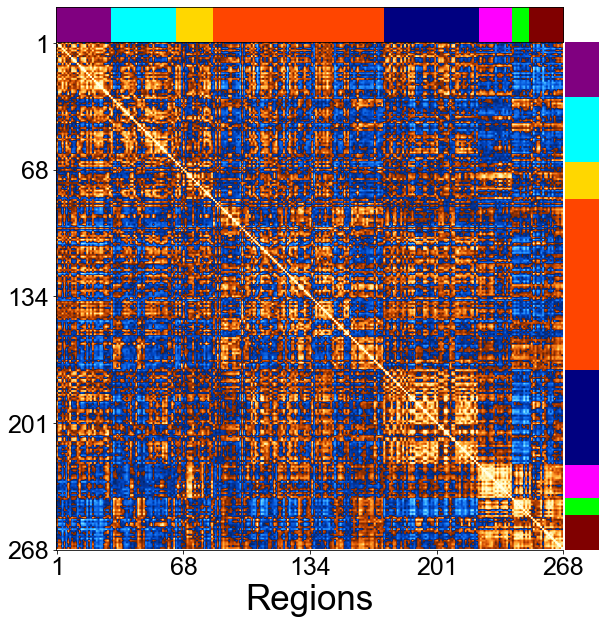

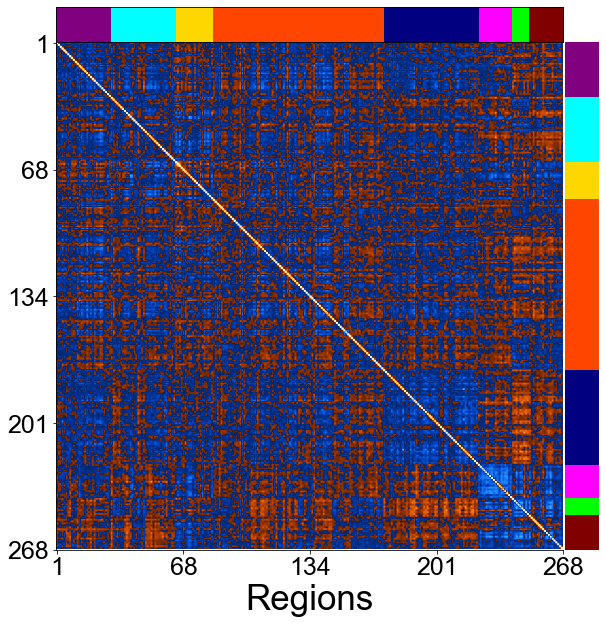

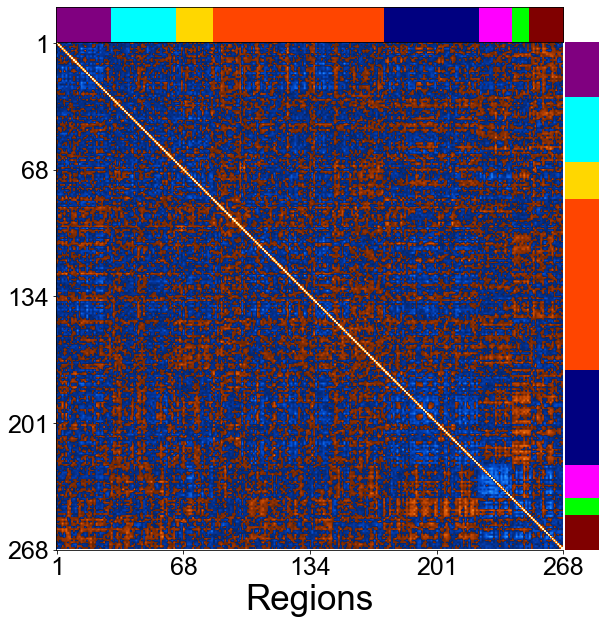

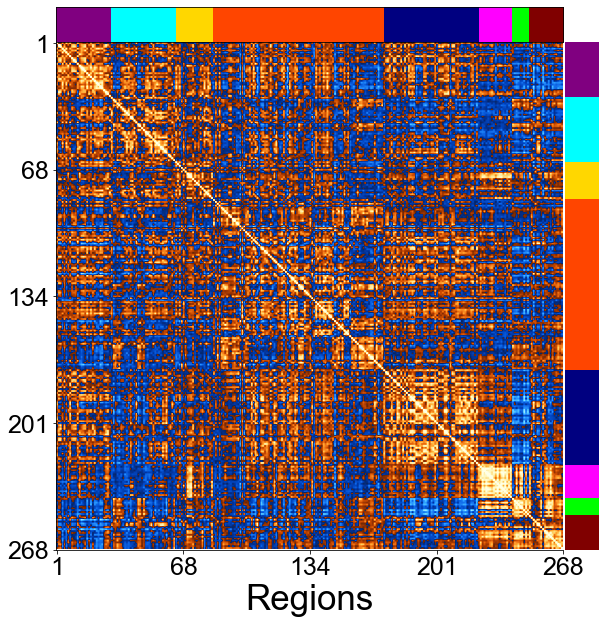

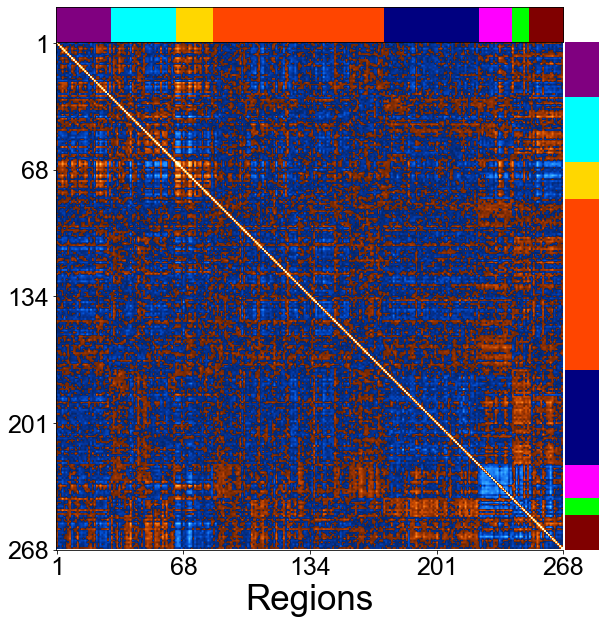

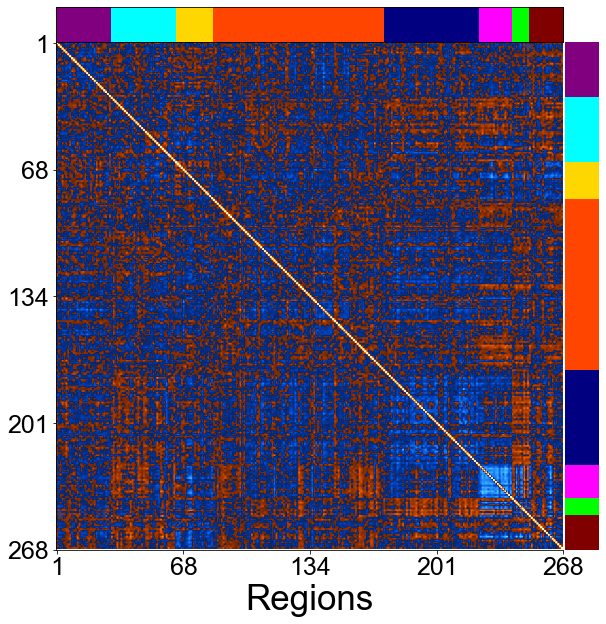

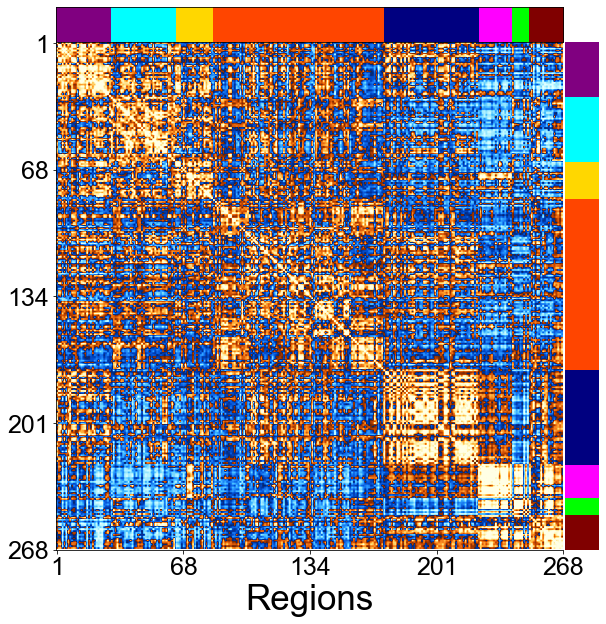

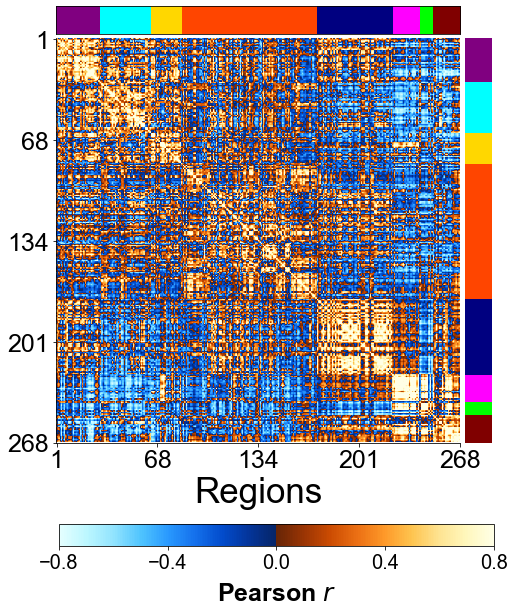

In [177]:
Path("../../plots/correlation_matrices").mkdir(exist_ok=True, parents=True)

for name, mat in cors_stroop.items():
    fig, _ , cbar = stat_mat_figure(mat)
    cbar.remove()
    #fig.suptitle("stroop_" + name, size=20)
    basename = "../plots/correlation_matrices/stroop_cors_%s" % name.lower()
    fig.savefig(basename + ".png", dpi=300)
    fig.savefig(basename + ".pdf", dpi=300)
    fig.savefig(basename + ".svg", dpi=300)
    
for name, mat in cors_msit.items():
    fig, _ , cbar = stat_mat_figure(mat)
    cbar.remove()
    #fig.suptitle("msit_" + name, size=20)
    basename = "../plots/correlation_matrices/msit_cors_%s" % name.lower()
    fig.savefig(basename + ".png", dpi=300)
    fig.savefig(basename + ".pdf", dpi=300)
    fig.savefig(basename + ".svg", dpi=300)
    
for name, mat in cors_rest.items():
    fig, _, cbar = stat_mat_figure(mat)
    cbar.remove()
    #fig.suptitle("rest_" + name, size=25)
    basename = "../plots/correlation_matrices/rest_cors_%s" % name.lower()
    fig.savefig(basename + ".png", dpi=300)
    fig.savefig(basename + ".pdf", dpi=300)
    fig.savefig(basename + ".svg", dpi=300)
    
# save with colorbar to take it in overleaf
fig, _, cbar = stat_mat_figure(mat)
fig.savefig(basename + "_with_colorbar.svg", dpi=300)

Compute correlations between connectivity matrices

In [4]:
corrs_df = dict()
for name, mat in cors_stroop.items():
    name = "stroop_" + name
    corrs_df[name] = squareform(mat, checks=False)
for name, mat in cors_msit.items():
    name = "msit_" + name
    corrs_df[name] = squareform(mat, checks=False)
for name, mat in cors_rest.items():
    name = "rest_" + name
    corrs_df[name] = squareform(mat, checks=False)
    
corrs_df = pd.DataFrame(corrs_df)
np.round(corrs_df.corr(method='spearman'), 2)

stroop_constant  stroop_Congruent  stroop_Incongruent  \
stroop_constant                1.00             -0.63               -0.31   
stroop_Congruent              -0.63              1.00                0.69   
stroop_Incongruent            -0.31              0.69                1.00   
msit_constant                  0.92             -0.47               -0.19   
msit_Congruent                -0.28              0.48                0.28   
msit_Incongruent              -0.10              0.31                0.48   
rest_constant                  0.81             -0.34               -0.17   

                    msit_constant  msit_Congruent  msit_Incongruent  \
stroop_constant              0.92           -0.28             -0.10   
stroop_Congruent            -0.47            0.48              0.31   
stroop_Incongruent          -0.19            0.28              0.48   
msit_constant                1.00           -0.43             -0.30   
msit_Congruent              -0.43            1.00              0.74   
msit_Incongruent            -0.30            0.74              1.00   
rest_constant                0.83           -0.14             -0.12   

                    rest_constant  
stroop_constant              0.81  
stroop_Congruent            -0.34  
stroop_Incongruent          -0.17  
msit_constant                0.83  
msit_Congruent              -0.14  
msit_Incongruent            -0.12  
rest_constant                1.00

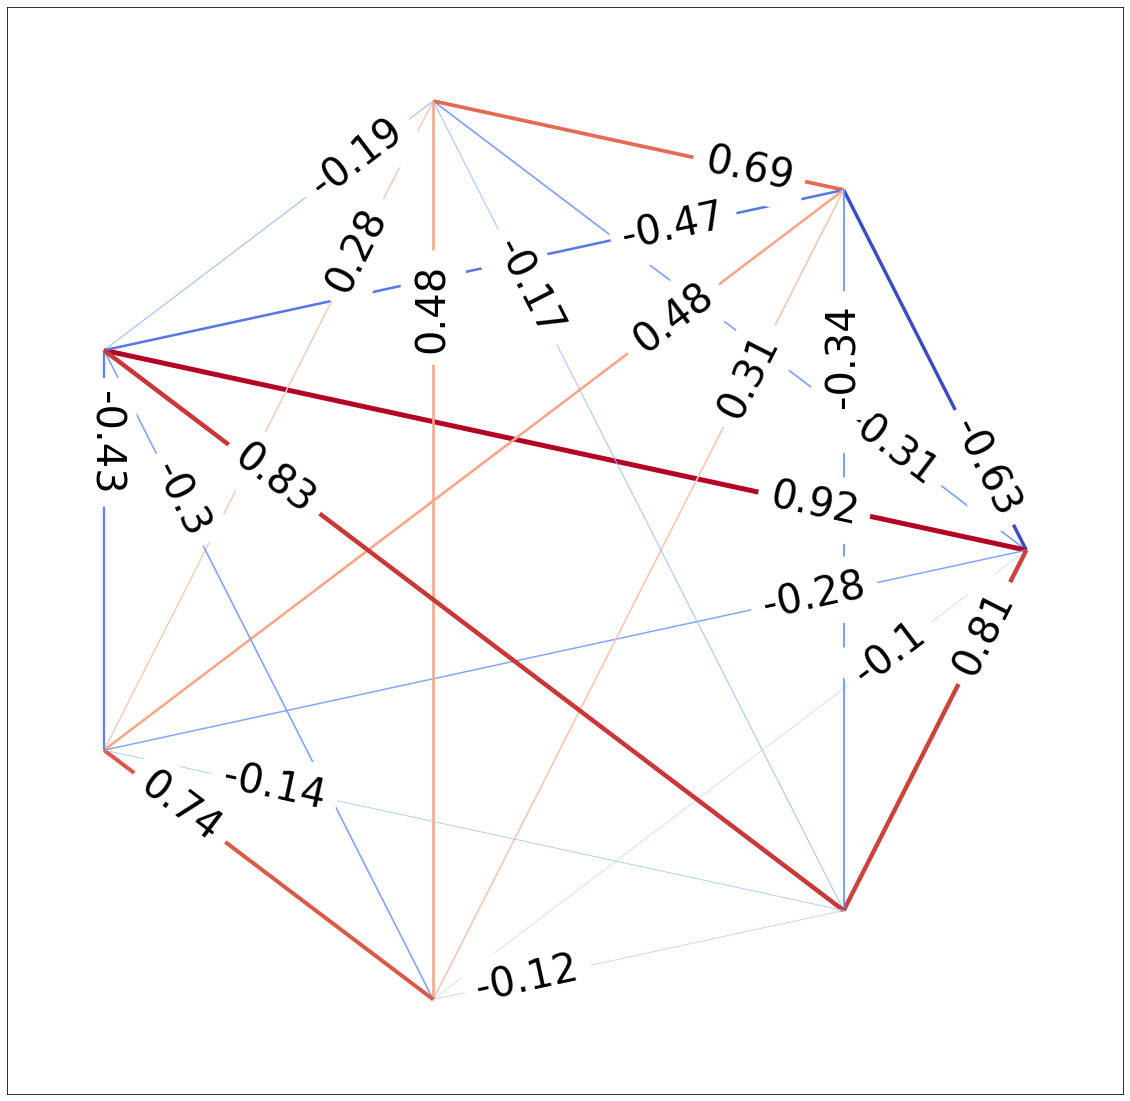

In [175]:
import networkx as nx
cor_mat = np.round(corrs_df.corr(method='spearman'), 2).to_numpy()
cor_mat[np.diag_indices(n=cor_mat.shape[1])] = 0
G = nx.from_numpy_matrix(cor_mat)

#shows the edges with their corresponding weights
G.edges(data=True)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

positions = nx.circular_layout(G)
#Figure size
plt.figure(figsize=(20,20))

#draws nodes
nx.draw_networkx_nodes(G,positions, node_color='#DA70D6',
                       node_size=0,alpha=0.8)

#Styling for labels
nx.draw_networkx_labels(G, positions, font_size=0, 
                        font_family='sans-serif')

#draws the edges
nx.draw_networkx_edges(G, positions, style='solid', 
                       edge_color = weights,  width=5*np.abs(maxabs_scale(weights)),
                       edge_cmap=plt.cm.coolwarm
                      )
nx.draw_networkx_edge_labels(G, positions, font_size=40,
                             edge_labels=nx.get_edge_attributes(G,'weight'), label_pos=0.77)
plt.savefig("../plots/graph_between_groupmats.png", bbox_inches="tight")
plt.savefig("../plots/graph_between_groupmats.svg", bbox_inches="tight")
plt.savefig("../plots/graph_between_groupmats.pdf", bbox_inches="tight")
pass

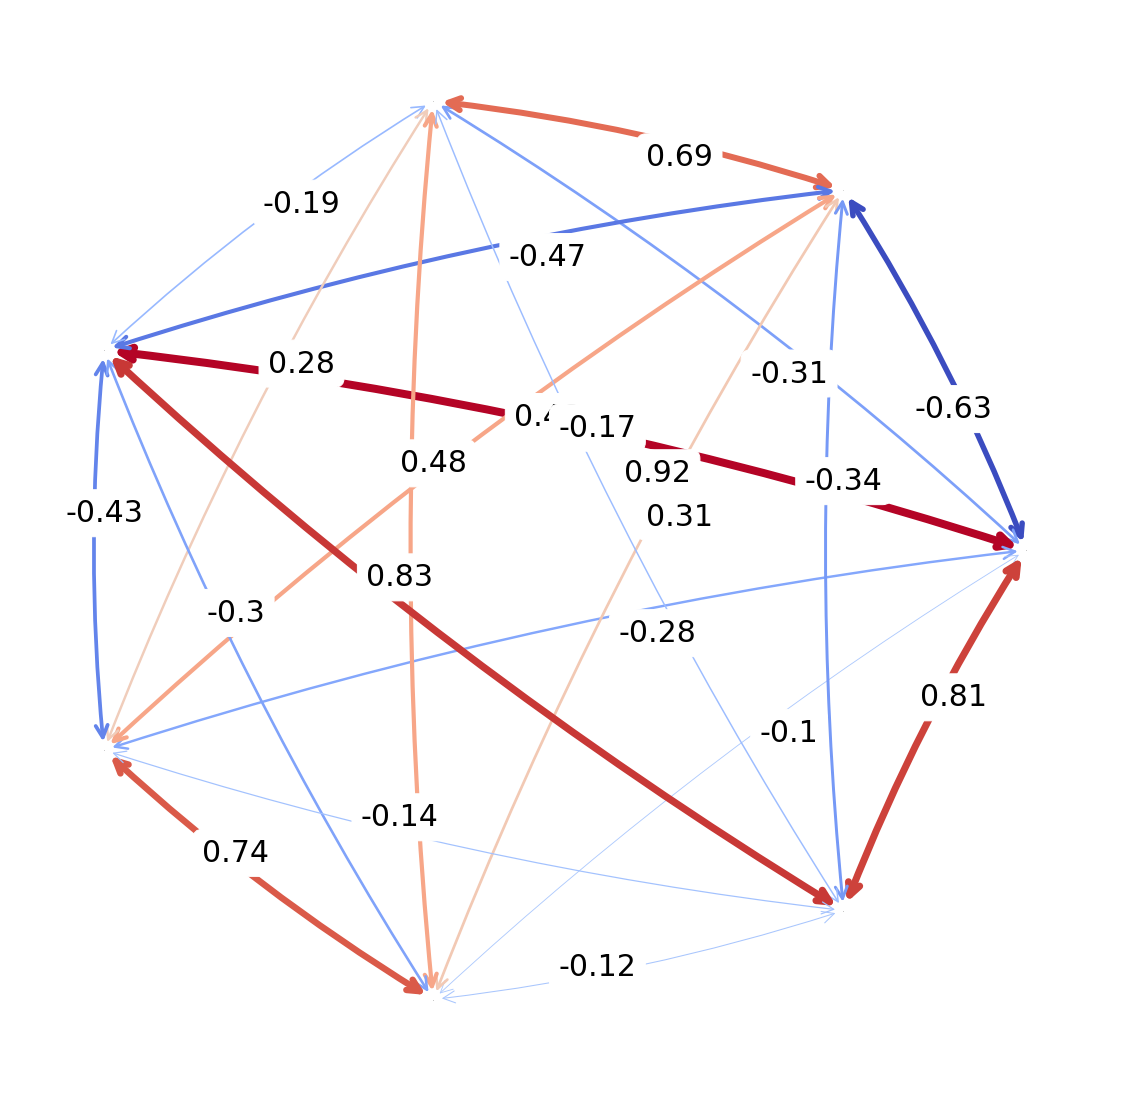

In [71]:
import networkx as nx
from sklearn.preprocessing import maxabs_scale

cor_mat = np.round(corrs_df.corr(method='spearman'), 2).to_numpy()
cor_mat[np.diag_indices(n=cor_mat.shape[1])] = 0
G = nx.from_numpy_matrix(cor_mat)

#shows the edges with their corresponding weights
G.edges(data=True)

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

positions = nx.circular_layout(G)
#Figure size
plt.figure(figsize=(20,20))

#draws nodes
nx.draw_networkx_nodes(G,positions, node_color='#DA70D6',
                       node_size=0,alpha=0.8)

#Styling for labels
nx.draw_networkx_labels(G, positions, font_size=0, 
                        font_family='sans-serif')

#draws the edges
nx.draw_networkx_edges(G, positions, style='solid', 
                       edge_color = weights,  width=8*np.abs(maxabs_scale(weights)),
                       edge_cmap=plt.cm.coolwarm, connectionstyle="arc3,rad=0.05",
                       arrows=True, arrowstyle='<->',arrowsize=30, #'<|-|>',
                      )
nx.draw_networkx_edge_labels(G, positions, font_size=30,
                             edge_labels=nx.get_edge_attributes(G,'weight'),  
                             label_pos=0.6, 
                             horizontalalignment='center',
                             verticalalignment='center_baseline', rotate=False)
plt.axis('off')
pass